## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import jit , njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types , pure

## Linear convection without CFL

In [46]:
def linearconv_withoutCFL(u, nx, nt, dx):
    dt = .025  
    c = 1.
    for n in range(nt): 
        for i in range(1, nx):
            u[i]=u[i]-c*dt/dx*(u[i]-u[i-1])
    return 0

## Linear convection with CFL

In [45]:
def linearconv_withCFL(u, nx, nt, dx):
    c = 1.
    CFL = 0.8
    dt = CFL*dx/np.fabs(c) 
    for n in range(nt): 
        for i in range(1, nx):
            u[i]=u[i]-c*dt/dx*(u[i]-u[i-1])
        
    return 0

## Inputs

In [41]:
nx = 201 #change to 83, 85, 91, ... what do you remark ?
dx = 2 / (nx - 1)
nt = 20    

grid = np.linspace(0,2,nx) 
u0 = np.ones(nx)      
u0[int(.5/dx):int(1 / dx + 1)] = 2  

## Call Funtions

### Function without CFL

Text(0.5, 1.0, '1D Linear Convection')

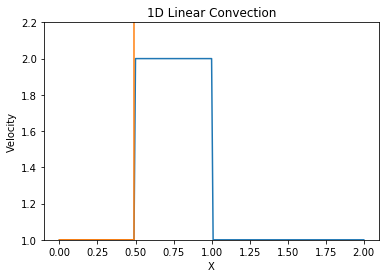

In [42]:
u = u0.copy()
linearconv_withoutCFL(u, nx, nt, dx)

plt.plot(grid,u0);
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')  

### Function with CFL

Text(0.5, 1.0, '1D Linear Convection')

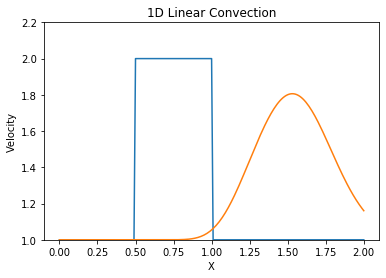

In [43]:
u = u0.copy()
linearconv_withCFL(u, nx, nt, dx)

plt.plot(grid,u0);
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection') 

* ### <font color='ushua'>We remark that without the CFL condition the schema is not stable that's can be explained by the fact that over the time period $\Delta t$, the wave is traveling a distance greater than dx (in other word, at certain point the wave get to an instance where the position isn't calculated yet)

* ### <font color='ushua'>The CFL condition calculate the appropriate time-step dt depending on the size of dx.